In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
from pylab import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Memristor Project files/SnO2 Narrowed data Work/25c_SnO2_Upsweep.csv")

In [ ]:
df1.head()

,Unnamed: 0,Voltage,Current,Voltage_diff,Cycle
0,0,0.000,-4.240000e-11,0.005,1.0
1,1,0.005,1.950000e-09,0.005,1.0
2,2,0.010,1.690000e-09,0.005,1.0
3,3,0.015,1.740000e-09,0.005,1.0
4,4,0.020,2.670000e-09,0.005,1.0


In [ ]:
df1["Current"]=df1["Current"].abs()
df1["Current"]=np.log10(df1["Current"])

In [ ]:
df1.head()

,Unnamed: 0,Voltage,Current,Voltage_diff,Cycle
0,0,0.000,-10.372634,0.005,1.0
1,1,0.005,-8.709965,0.005,1.0
2,2,0.010,-8.772113,0.005,1.0
3,3,0.015,-8.759451,0.005,1.0
4,4,0.020,-8.573489,0.005,1.0


In [ ]:
X1=df1.iloc[:,[1,4]]
y1=df1["Current"]

In [ ]:
X1["Voltage"].head(10500)

0        0.000
1        0.005
2        0.010
3        0.015
4        0.020
         ...  
10495    0.410
10496    0.415
10497    0.420
10498    0.425
10499    0.430
Name: Voltage, Length: 10500, dtype: float64

In [ ]:
y1.head()

0   -10.372634
1    -8.709965
2    -8.772113
3    -8.759451
4    -8.573489
Name: Current, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size= 1/10, random_state=5)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

Epoch 1/150
1442/1442 [==============================] - 15s 8ms/step - loss: 1.3555 - val_loss: 0.2574
Epoch 2/150
1442/1442 [==============================] - 12s 9ms/step - loss: 0.2076 - val_loss: 0.1042
Epoch 3/150
1442/1442 [==============================] - 7s 5ms/step - loss: 0.1724 - val_loss: 0.1134
Epoch 4/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.1501 - val_loss: 0.1288
Epoch 5/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.1307 - val_loss: 0.0932
Epoch 6/150
1442/1442 [==============================] - 7s 5ms/step - loss: 0.1249 - val_loss: 0.1392
Epoch 7/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.1118 - val_loss: 0.1289
Epoch 8/150
1442/1442 [==============================] - 6s 4ms/step - loss: 0.1136 - val_loss: 0.0801
Epoch 9/150
1442/1442 [==============================] - 5s 4ms/step - loss: 0.1064 - val_loss: 0.0780
Epoch 10/150
1442/1442 [==============================] - 5s 3ms/step -

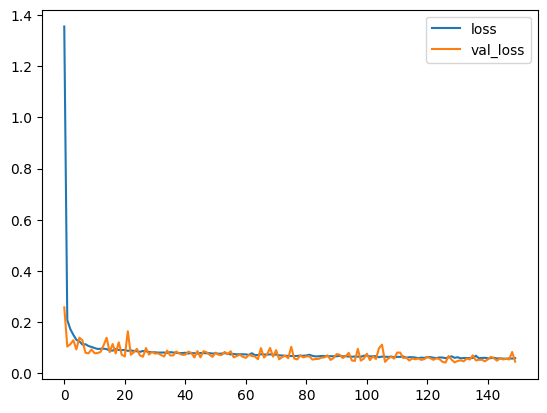

In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta=0.005, patience=50,
                                        restore_best_weights=True)

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[2],kernel_initializer='normal',bias_initializer='zeros'),
    # layers.Dense(100, activation='sigmoid', input_shape=[2],kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(200, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(300, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    # layers.Dense(200, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(100, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(1,activation='linear',kernel_initializer='normal')#,activation='linear',kernel_initializer='normal'
])
model.compile(
    optimizer='adam',
    loss='mse',
)
history = model.fit(
    X1_train, y1_train,
    # validation_data=(X_test, y_test),
    batch_size=10,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
# model.save('model1')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Memristor Project files/SnO2 Narrowed data Work/Saved_models/model1')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 111,001
Trainable params: 111,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model2.summary()

In [ ]:
history_df.loc[:, ['val_loss']].plot()

NameError: ignored

In [ ]:
history_df.loc[3:, ['loss', 'val_loss']].plot()
plt.xlabel('Current (mA)', fontsize=20)
plt.ylabel('Voltage (V)', fontsize=20)

In [ ]:
y1_pred=model.predict(X1_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
import math
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y1_test, y1_pred)
rsquared = sklearn.metrics.r2_score(y1_test, y1_pred)
rmse = math.sqrt(mse)
mape = sklearn.metrics.mean_absolute_percentage_error(y1_test, y1_pred)

print("R2=", rsquared)
print("MSE=", mse)
print("RMSE=", rmse)
print("MAPE=", mape)

R2= 0.9837952702371331
MSE= 0.04846374834054307
RMSE= 0.22014483491679532
MAPE= 0.019631216897590054


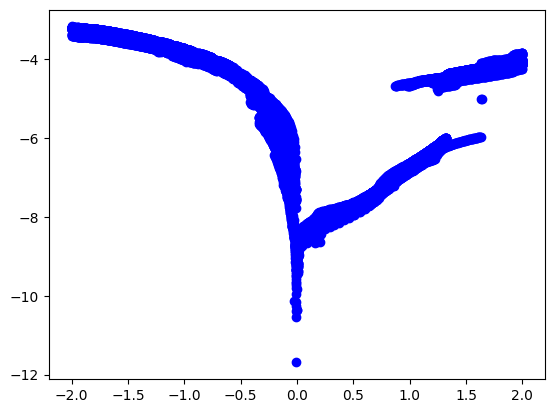

In [ ]:
plt.scatter(X1["Voltage"],y1,color='blue')

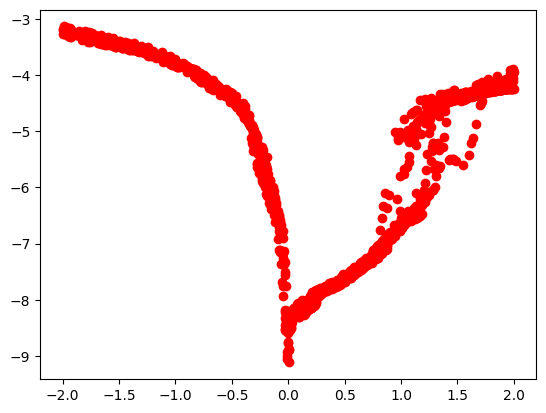

In [ ]:
plt.scatter(X1_test["Voltage"],y1_pred,color='red')

DownSweep


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Memristor Project files/SnO2 Narrowed data Work/25c_SnO2_Downsweep.csv")

In [ ]:
df2["Current"]=df2["Current"].abs()
df2["Current"]=np.log10(df2["Current"])

In [ ]:
df2.head()

,Unnamed: 0,Voltage,Current,Voltage_diff,Cycle
0,0,2.000,-3.844664,0.005,1.0
1,1,1.995,-3.847712,-0.005,1.0
2,2,1.990,-3.850781,-0.005,1.0
3,3,1.985,-3.853872,-0.005,1.0
4,4,1.980,-3.856985,-0.005,1.0


In [ ]:
X2=df2.iloc[:,[1,4]]
y2=df2["Current"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2, test_size= 1/10, random_state=5)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

Epoch 1/150
1442/1442 [==============================] - 6s 4ms/step - loss: 0.6398 - val_loss: 0.0804
Epoch 2/150
1442/1442 [==============================] - 6s 4ms/step - loss: 0.1083 - val_loss: 0.2181
Epoch 3/150
1442/1442 [==============================] - 6s 4ms/step - loss: 0.1044 - val_loss: 0.0668
Epoch 4/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.0931 - val_loss: 0.0542
Epoch 5/150
1442/1442 [==============================] - 6s 4ms/step - loss: 0.0853 - val_loss: 0.0995
Epoch 6/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.0756 - val_loss: 0.0814
Epoch 7/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.0793 - val_loss: 0.0739
Epoch 8/150
1442/1442 [==============================] - 7s 5ms/step - loss: 0.0759 - val_loss: 0.0557
Epoch 9/150
1442/1442 [==============================] - 5s 3ms/step - loss: 0.0692 - val_loss: 0.0710
Epoch 10/150
1442/1442 [==============================] - 6s 4ms/step - l

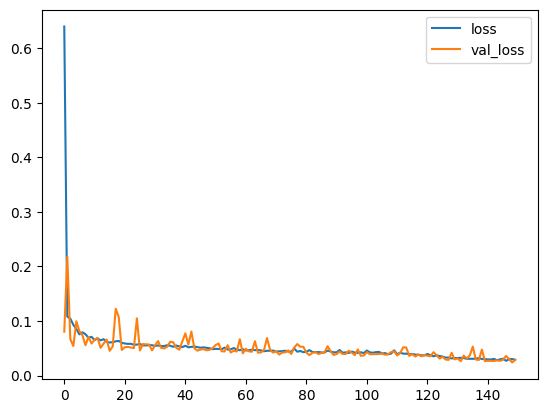

In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta=0.0005, patience=50,
                                        restore_best_weights=True)

model2 = keras.Sequential([
    layers.Dense(200, activation='relu', input_shape=[2],kernel_initializer='normal',bias_initializer='zeros'),
    # layers.Dense(100, activation='sigmoid', input_shape=[2],kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(200, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    # layers.Dense(400, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(200, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(200, activation='relu',kernel_initializer='normal',bias_initializer='zeros'),
    layers.Dense(1,activation='linear',kernel_initializer='normal')#,activation='linear',kernel_initializer='normal'
])
model2.compile(
    optimizer='adam',
    loss='mse',
)
history2 = model2.fit(
    X2_train, y2_train,
    # validation_data=(X_test, y_test),
    batch_size=10,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping]
)
history_df2 = pd.DataFrame(history2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df2['val_loss'].min()));

In [ ]:
model2.save('model2')

In [ ]:
model2 = keras.models.load_model('/content/drive/MyDrive/Memristor Project files/SnO2 Narrowed data Work/Saved_models/model2')

<Axes: >

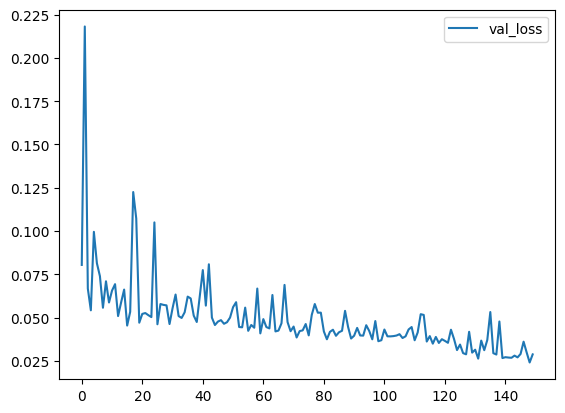

In [ ]:
history_df2.loc[:, ['val_loss']].plot()

<Axes: >

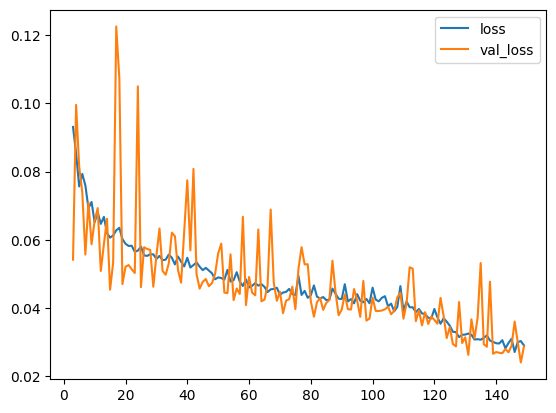

In [ ]:
history_df2.loc[3:, ['loss', 'val_loss']].plot()

In [ ]:
y2_pred=model2.predict(X2_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
import math
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y2_test, y2_pred)
rsquared = sklearn.metrics.r2_score(y2_test, y2_pred)
rmse = math.sqrt(mse)
mape = sklearn.metrics.mean_absolute_percentage_error(y2_test, y2_pred)

print("R2=", rsquared)
print("MSE=", mse)
print("RMSE=", rmse)
print("MAPE=", mape)

R2= 0.9733671053718757
MSE= 0.02873796102081995
RMSE= 0.16952274484805852
MAPE= 0.01551209563387725


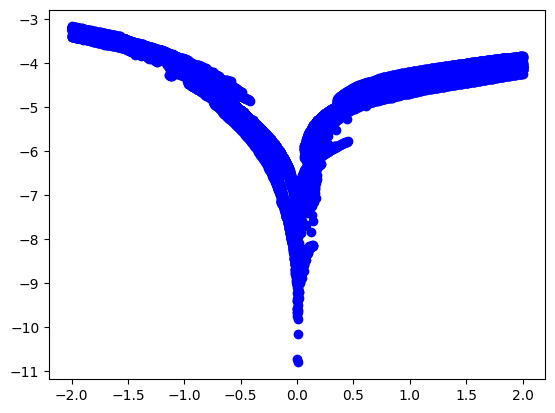

In [ ]:

plt.scatter(X2["Voltage"],y2,color='blue')

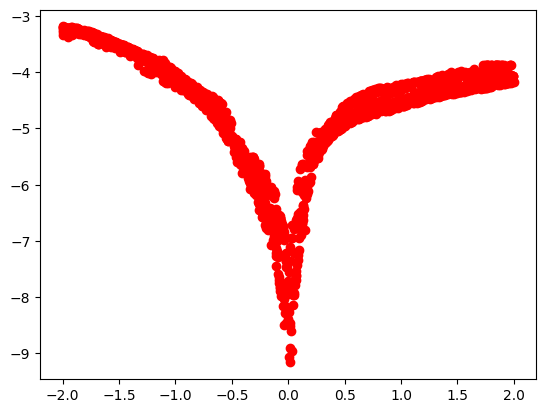

In [ ]:
plt.scatter(X2_test["Voltage"],y2_pred,color='red')

Entire Dataset


In [ ]:
y2_test=pd.DataFrame(y2_test)
y1_test=pd.DataFrame(y1_test)
y2_pred=pd.DataFrame(y2_pred)
y1_pred=pd.DataFrame(y1_pred)
y_test=y1_test.append(y2_test, ignore_index=True)
y1_pred=y1_pred.append(y2_pred,ignore_index=True)

mse = sklearn.metrics.mean_squared_error(y_test, y1_pred)
rsquared = sklearn.metrics.r2_score(y_test, y1_pred)
rmse = math.sqrt(mse)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y1_pred)


print("R2=", rsquared)
print("MSE=", mse)
print("RMSE=", rmse)
print("MAPE=", mape)

R2= 0.9818392914617491
MSE= 0.03860085468068151
RMSE= 0.19647100213690952
MAPE= 0.017571656265733652


<ipython-input-33-3417b3b98852>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test=y1_test.append(y2_test, ignore_index=True)
<ipython-input-33-3417b3b98852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y1_pred=y1_pred.append(y2_pred,ignore_index=True)


In [ ]:
def create_single_cycle(n):

    #upsweep
    df1_single=df1.loc[df1["Cycle"]==n]
    df1_single = df1_single.sort_values("Voltage")

    X1_single=df1_single.iloc[:,[1,4]]
    y1_single=df1_single["Current"]


    #downsweep
    df2_single=df2.loc[df2["Cycle"]==n]


    df2_single = df2_single.sort_values("Voltage")

    X2_single=df2_single.iloc[:,[1,4]]
    y2_single=df2_single["Current"]

    return X1_single,y1_single, X2_single,y2_single

In [ ]:
def create_single_cycle_predicted(n):

    #upsweep
    df1_single=df1.loc[df1["Cycle"]==n]

    df1_single = df1_single.sort_values("Voltage")

    X1_single=df1_single.iloc[:,[1,4]]

    y1_single=df1_single["Current"]

    y1_single_pred=model.predict(X1_single)

    y1_single_pred=pd.DataFrame(y1_single_pred)





    #downsweep
    df2_single=df2.loc[df2["Cycle"]==n]

    df2_single = df2_single.sort_values("Voltage")

    X2_single=df2_single.iloc[:,[1,4]]

    y2_single=df2_single["Current"]

    y2_single_pred=model2.predict(X2_single)

    y2_single_pred=pd.DataFrame(y2_single_pred)

    return X1_single,y1_single_pred, X2_single,y2_single_pred

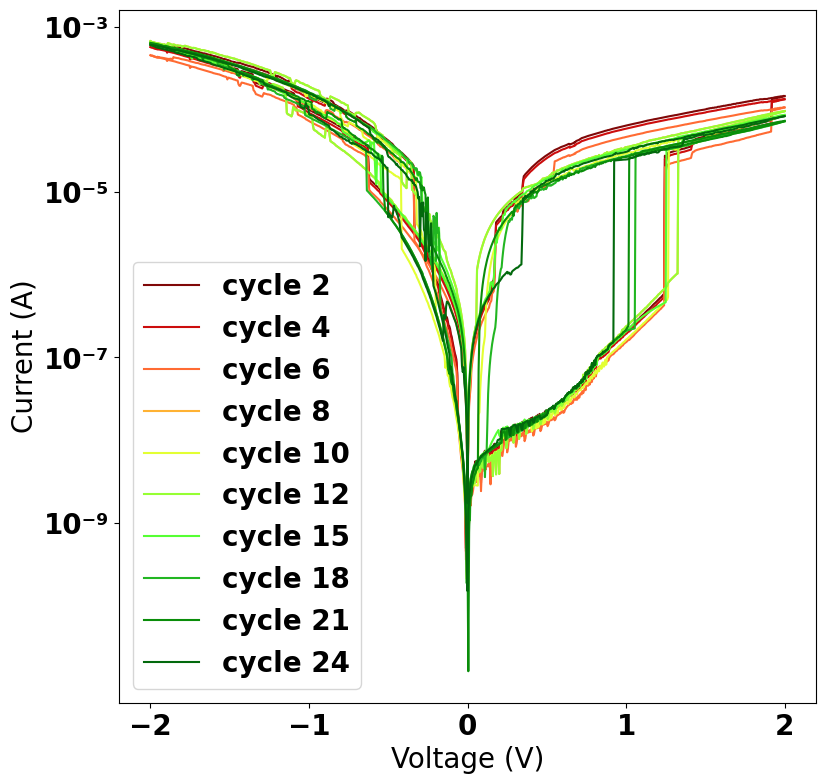

In [ ]:
n=[2,4,6,8,10,12,15,18,21,24]
# colors=["red","orange","yellow","green","blue"]15
colors=["#800808","#CC0D0D","#FF6B33","#FFB233","#E3FF33","#96FF33","#55FF33","#22B622","#0A8D0A","#02690D"]

for i in range(len(n)):
    X1_single,y1_single, X2_single,y2_single=create_single_cycle(n[i])
    plt.plot(X1_single["Voltage"],y1_single,color=colors[i],label=('cycle ' +str(n[i])))

    plt.plot(X2_single["Voltage"],y2_single,color=colors[i])
#     plt.show()
plt.legend(loc="best")
# plt.grid()
plt.gcf().set_size_inches((6, 6))
plt.xlabel('Voltage (V)', fontdict = {'fontname':'serif', 'fontsize':20, 'fontweight': 'bold'})
plt.ylabel('Current (A)', fontdict = {'fontname':'serif', 'fontsize':20, 'fontweight': 'bold'})
plt.xticks([-2,-1,0,1,2], weight = 'bold', fontsize = 20)
plt.yticks([-3,-5,-7,-9], labels = ['10\u207B\u00b3', '10\u207B\u2075', '10\u207B\u2077', '10\u207B\u2079'], weight = 'bold', fontsize = 20)
plt.show()

26/26 [==============================] - 0s 3ms/step


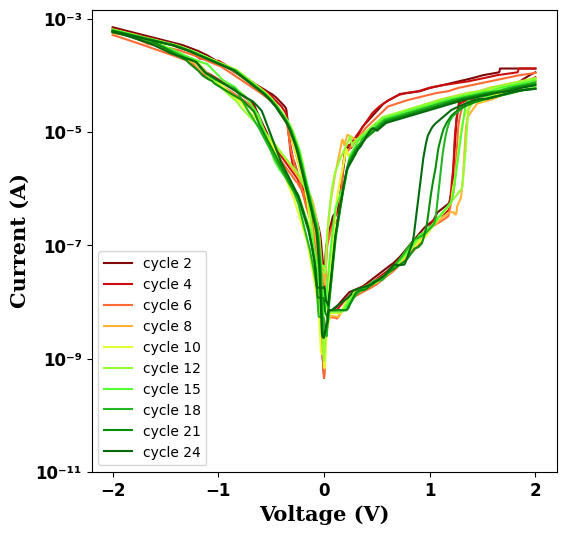

In [ ]:
n=[2,4,6,8,10,12,15,18,21,24]
# colors=["red","orange","yellow","green","blue"]15
colors=["#800808","#CC0D0D","#FF6B33","#FFB233","#E3FF33","#96FF33","#55FF33","#22B622","#0A8D0A","#02690D"]
for i in range(len(n)):
    X1_single,y1_single_pred, X2_single,y2_single_pred=create_single_cycle_predicted(n[i])
    plt.plot(X1_single["Voltage"],y1_single_pred,color=colors[i],label=('cycle ' +str(n[i])))
    plt.plot(X2_single["Voltage"],y2_single_pred,color=colors[i])
plt.legend(loc="best")
# plt.grid()
plt.gcf().set_size_inches((6,6))
plt.xlabel('Voltage (V)', fontdict = {'fontname':'Times New Roman', 'fontsize':20, 'fontweight': 'bold'})
plt.ylabel('Current (A)', fontdict = {'fontname': 'serif', 'fontsize':15, 'fontweight': 'bold'})
plt.xticks([-2,-1,0,1,2], weight = 'bold', fontsize = 12)
plt.yticks([-3,-5,-7,-9], labels = ['10\u207B\u00b3', '10\u207B\u2075', '10\u207B\u2077', '10\u207B\u2079', '10\u207B\u00b9\u00b9'], weight = 'bold', fontsize = 12)
plt.show()
# plt.gcf().set_size_inches((9,9))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 111,001
Trainable params: 111,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               600       
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 200)               40200     
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 121,401
Trainable params: 121,401
Non-trainable params: 0
_________________________________________________________________


26/26 [==============================] - 0s 2ms/step


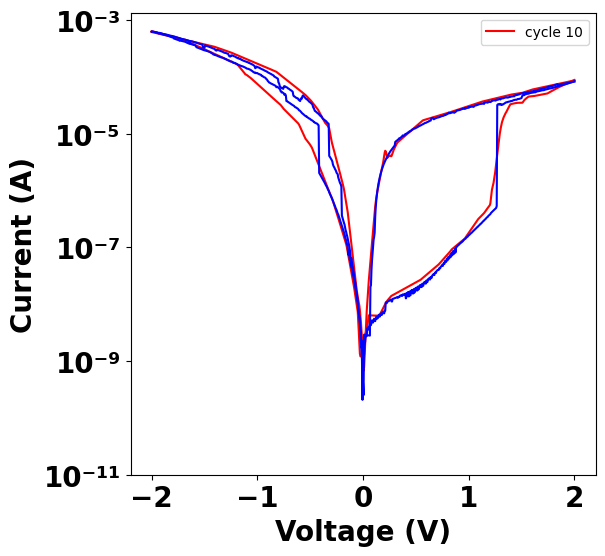

In [ ]:
n=10
X1_single,y1_single_pred, X2_single,y2_single_pred=create_single_cycle_predicted(n)
X1_single,y1_single, X2_single,y2_single=create_single_cycle(n)
plt.plot(X1_single["Voltage"],y1_single_pred,color="red",label=('cycle ' +str(n)))
plt.plot(X2_single["Voltage"],y2_single_pred,color="red")#predicted

plt.plot(X1_single["Voltage"],y1_single,color="blue")
plt.plot(X2_single["Voltage"],y2_single,color="blue")#actual


plt.legend(loc="best")
# plt.grid()
plt.gcf().set_size_inches((6,6))
plt.xlabel('Voltage (V)', fontdict = {'fontname':'Times New Roman', 'fontsize':20, 'fontweight': 'bold'})
plt.ylabel('Current (A)', fontdict = {'fontname':'Times New Roman', 'fontsize':20, 'fontweight': 'bold'})
plt.xticks([-2,-1,0,1,2], weight = 'bold', fontsize = 20)
plt.yticks([-3,-5,-7,-9], labels = ['10\u207B\u00b3', '10\u207B\u2075', '10\u207B\u2077', '10\u207B\u2079'], weight = 'bold', fontsize = 20)
plt.show()

In [ ]:
df1_f=pd.DataFrame()
df2_f=pd.DataFrame()

# n=[2,4,6,8,10,12,15,18,21,24]
n=np.arange(1,51,1)
for i in range(len(n)):
  V1_b=np.arange(-5,5.005,0.005)
  V2_b=np.arange(5,-5.005,-0.005)

  Cycle_b=n[i]

  X1_b=pd.DataFrame(V1_b, columns=["Voltage"])
  X2_b=pd.DataFrame(V2_b, columns=["Voltage"])

  X1_b["Cycle"]=pd.Series([Cycle_b for x in range(len(X1_b.index))])
  X2_b["Cycle"]=pd.Series([Cycle_b for x in range(len(X2_b.index))])

  y1_b=model.predict(X1_b)
  y2_b=model2.predict(X2_b)

  df1_b = X1_b
  df2_b = X2_b

  df1_b["log(|Current|)"]=y1_b
  df2_b["log(|Current|)"]=y2_b

  df1_f = df1_f.append(df1_b, ignore_index=True)
  df2_f = df2_f.append(df2_b, ignore_index=True)

63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 4ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 4ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


 1/63 [..............................] - ETA: 2s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


18/63 [=======>......................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 3ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


19/63 [========>.....................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


33/63 [==============>...............] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


52/63 [=======================>......] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 1ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


51/63 [=======================>......] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


49/63 [======================>.......] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


20/63 [========>.....................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 4ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 4ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


16/63 [======>.......................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


 1/63 [..............................] - ETA: 3s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


 1/63 [..............................] - ETA: 2s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


 1/63 [..............................] - ETA: 2s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 5ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


21/63 [=========>....................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


49/63 [======================>.......] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


 1/63 [..............................] - ETA: 1s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


24/63 [==========>...................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


20/63 [========>.....................] - ETA: 0s

<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


63/63 [==============================] - 0s 2ms/step


<ipython-input-41-c9e845186611>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_f = df1_f.append(df1_b, ignore_index=True)
<ipython-input-41-c9e845186611>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_f = df2_f.append(df2_b, ignore_index=True)


In [ ]:
df1_f

,Voltage,Cycle,log(|Current|)
0,-5.000,1,-2.398175
1,-4.995,1,-2.398489
2,-4.990,1,-2.398803
3,-4.985,1,-2.399118
4,-4.980,1,-2.399432
...,...,...,...
100045,4.980,50,-4.524464
100046,4.985,50,-4.523736
100047,4.990,50,-4.523007
100048,4.995,50,-4.522278


In [ ]:
# df1_f.to_csv('Type2_model_Upsweep.csv')
# df2_f.to_csv('Type2_model_Downsweep.csv')